In [16]:
import subprocess

subprocess.run(['python', '-m', 'GenerateStats.gen_stats'])

Running Simulation with task distribution estimation...
Saving stats in stats_with_learning.csv...
Running Simulation with fixed task distribution...
Saving stats in stats_without_learning.csv...


CompletedProcess(args=['python', '-m', 'GenerateStats.gen_stats'], returncode=0)

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

plt.style.use('seaborn-v0_8-dark')

df_learning = pd.read_csv("stats_with_learning.csv")


df = pd.read_csv("stats_without_learning.csv")


number_of_tasks = df["number_of_tasks"].iloc[0]

df = df.drop(["number_of_tasks"], axis=1)
df_learning = df_learning.drop(["number_of_tasks"], axis=1)

print(df_learning)
print(df)

     time  costs  serv_times   runtimes
0       0     80           0   1.535507
1       1    120           0   1.535619
2       2    160           0   1.535725
3       3    200           0   1.535830
4       4    240           0   1.535939
..    ...    ...         ...        ...
487   487  19560          62  23.864767
488   488  19600          62  23.943701
489   489  19640          62  23.964800
490   490  19680          62  23.999109
491   491  19720         127  24.084291

[492 rows x 4 columns]
     time  costs  serv_times   runtimes
0       0     80           0   2.051788
1       1    120           0   2.051897
2       2    160           0   2.052000
3       3    200           0   2.052108
4       4    240           0   2.052211
..    ...    ...         ...        ...
450   450  18080          46  25.276327
451   451  18120          75  25.321404
452   452  18160          75  25.410044
453   453  18200          75  25.461992
454   454  18240          73  25.542597

[455 rows x 4 c

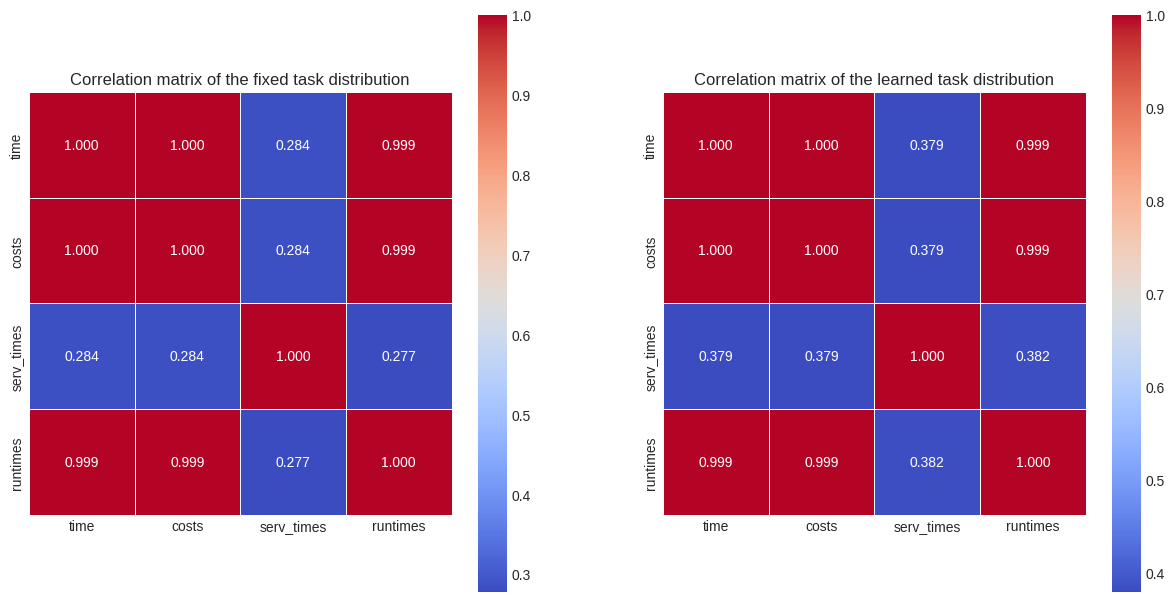

In [53]:
import seaborn as sns

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

sns.heatmap(data=df.corr(), annot=True, 
                      fmt='.3f', cmap='coolwarm', 
                      square=True, linewidths=.5, 
                      cbar_kws={'shrink': .5}, ax=ax[0])

ax[0].set_title("Correlation matrix of the fixed task distribution")

sns.heatmap(data=df_learning.corr(), annot=True, 
                      fmt='.3f', cmap='coolwarm', 
                      square=True, linewidths=.5, 
                      cbar_kws={'shrink': .5}, ax=ax[1])

ax[1].set_title("Correlation matrix of the learned task distribution")

plt.show()

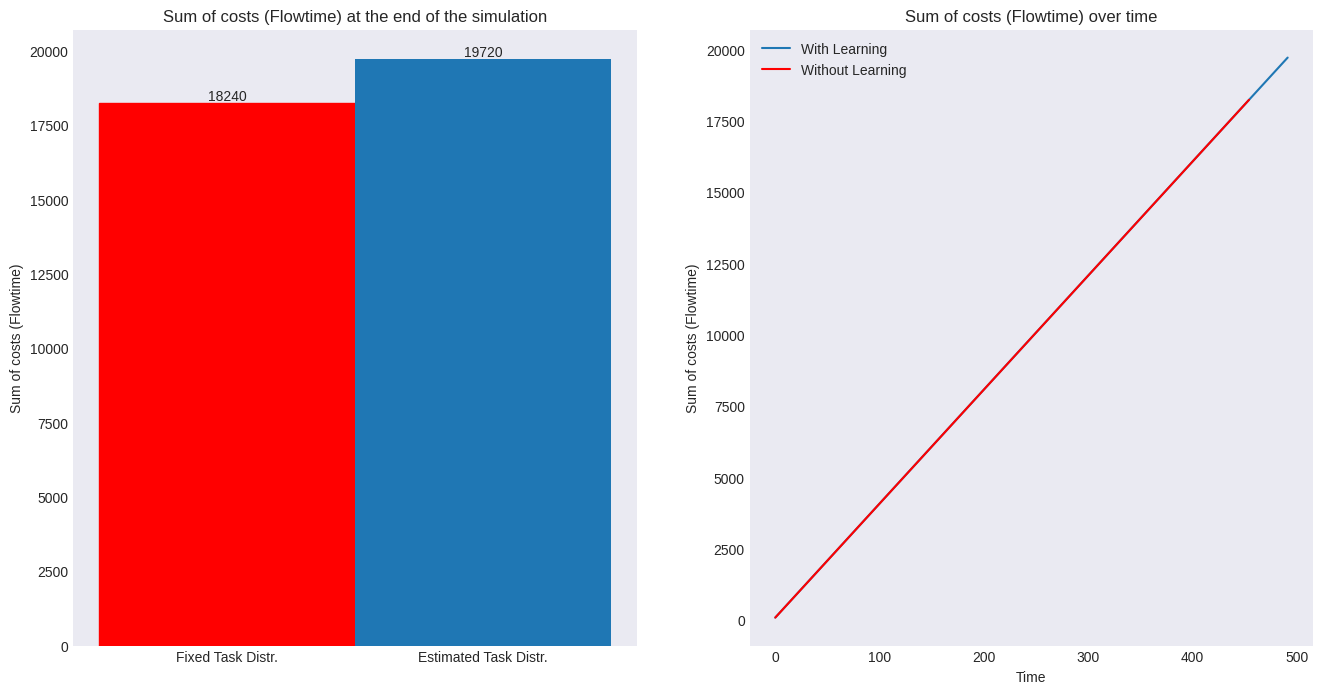

In [16]:
cost = df["costs"].iloc[-1]
cost_learning = df_learning["costs"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [cost, cost_learning], width=1, align='center')
ax[0].bar_label(bars, labels=[cost, cost_learning])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
ax[0].set_title("Sum of costs (Flowtime) at the end of the simulation")
ax[0].set_ylabel("Sum of costs (Flowtime)")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], df_learning["costs"], label="With Learning")
ax[1].plot(df["time"], df["costs"], label="Without Learning", color="r")
ax[1].set_title("Sum of costs (Flowtime) over time")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Sum of costs (Flowtime)")

ax[1].legend()

plt.show()

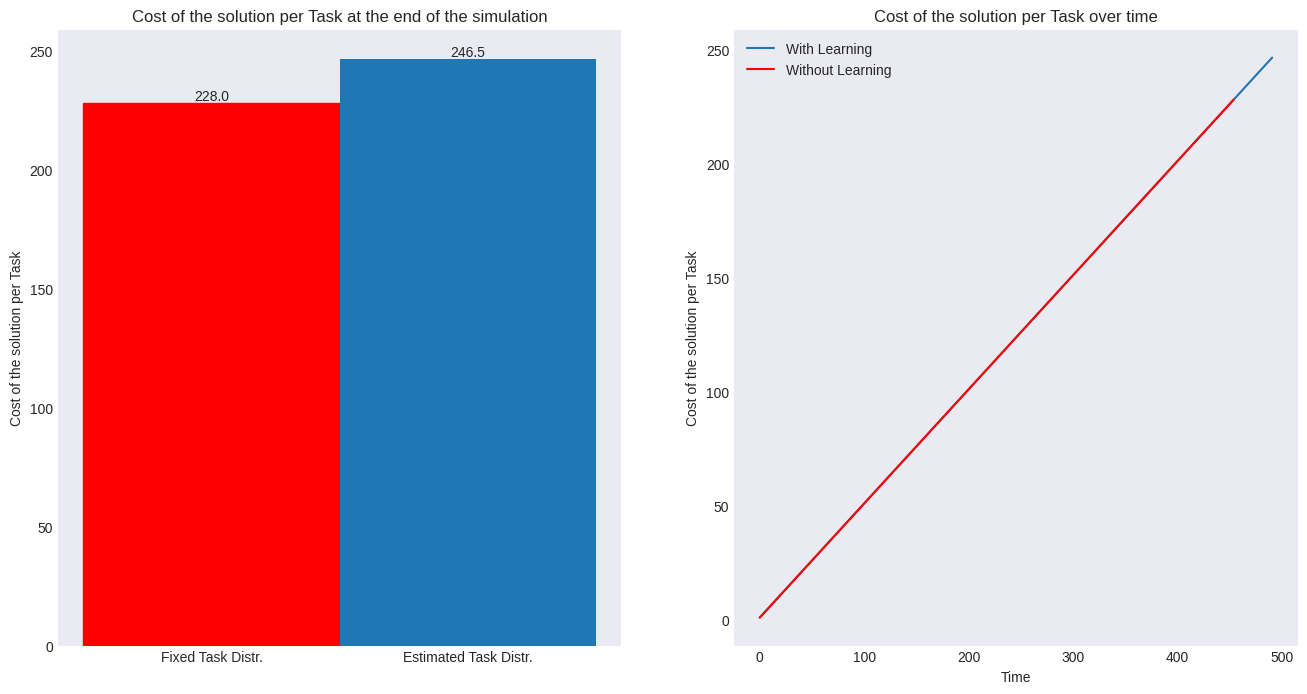

In [15]:
costs_per_task = df['costs'].apply(lambda x: x / df['number_of_tasks'].iloc[0])
costs_per_task_learning  = df_learning['costs'].apply(lambda x: x / df_learning['number_of_tasks'].iloc[0])

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=[costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
ax[0].set_title("Cost of the solution per Task at the end of the simulation")
ax[0].set_ylabel("Cost of the solution per Task")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], costs_per_task_learning, label="With Learning")
ax[1].plot(df["time"], costs_per_task, label="Without Learning", color="r")
ax[1].set_title("Cost of the solution per Task over time")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Cost of the solution per Task")

ax[1].legend()

plt.show()

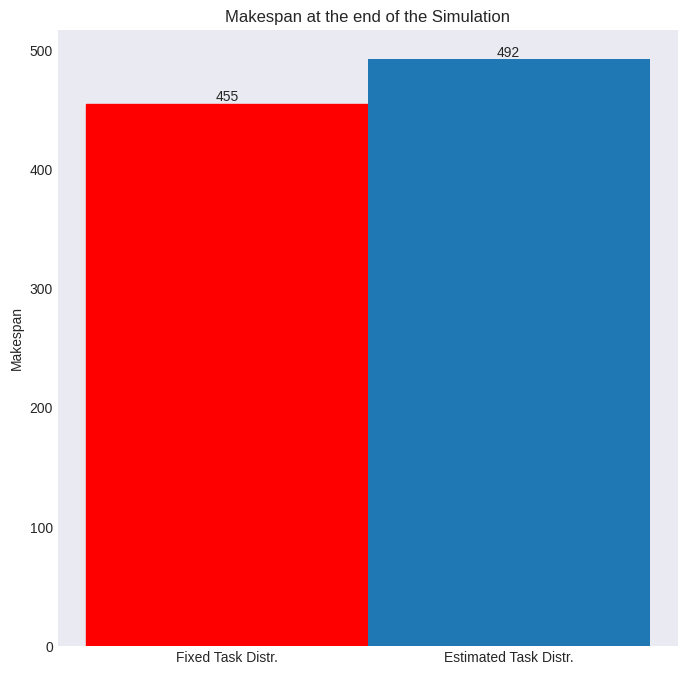

In [17]:
makespan = df["time"].iloc[-1] + 1
makespan_learning = df_learning["time"].iloc[-1] + 1

plt.figure(figsize=(8, 8))

bars = plt.bar([0, 1], [makespan, makespan_learning], width=1, align='center')
plt.bar_label(bars, labels=[makespan, makespan_learning])
plt.xticks([0, 1], labels=['Fixed Task Distr.', 'Estimated Task Distr.'])
bars[0].set_color('r')
plt.title("Makespan at the end of the Simulation")
plt.ylabel("Makespan")

plt.show()

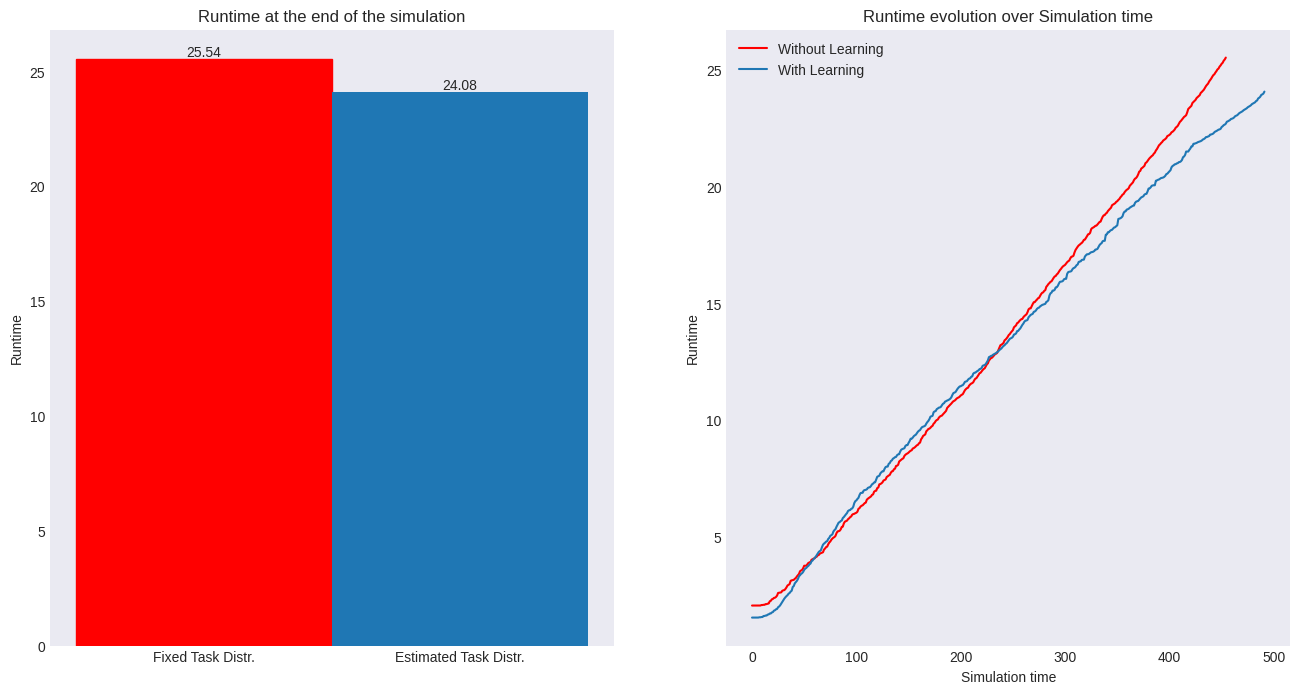

In [18]:
runtime = df["runtimes"].iloc[-1]
runtime_learning = df_learning["runtimes"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [runtime, runtime_learning], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(runtime), "{:.2f}".format(runtime_learning)])
bars[0].set_color('r')
ax[0].set_title("Runtime at the end of the simulation")
ax[0].set_ylabel("Runtime")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distr.', 'Estimated Task Distr.'])

ax[1].plot(df["time"], df["runtimes"], label="Without Learning", color="r")
ax[1].plot(df_learning["time"], df_learning["runtimes"], label="With Learning")
ax[1].set_title("Runtime evolution over Simulation time")
ax[1].set_xlabel('Simulation time')
ax[1].set_ylabel("Runtime")

ax[1].legend()

plt.show()

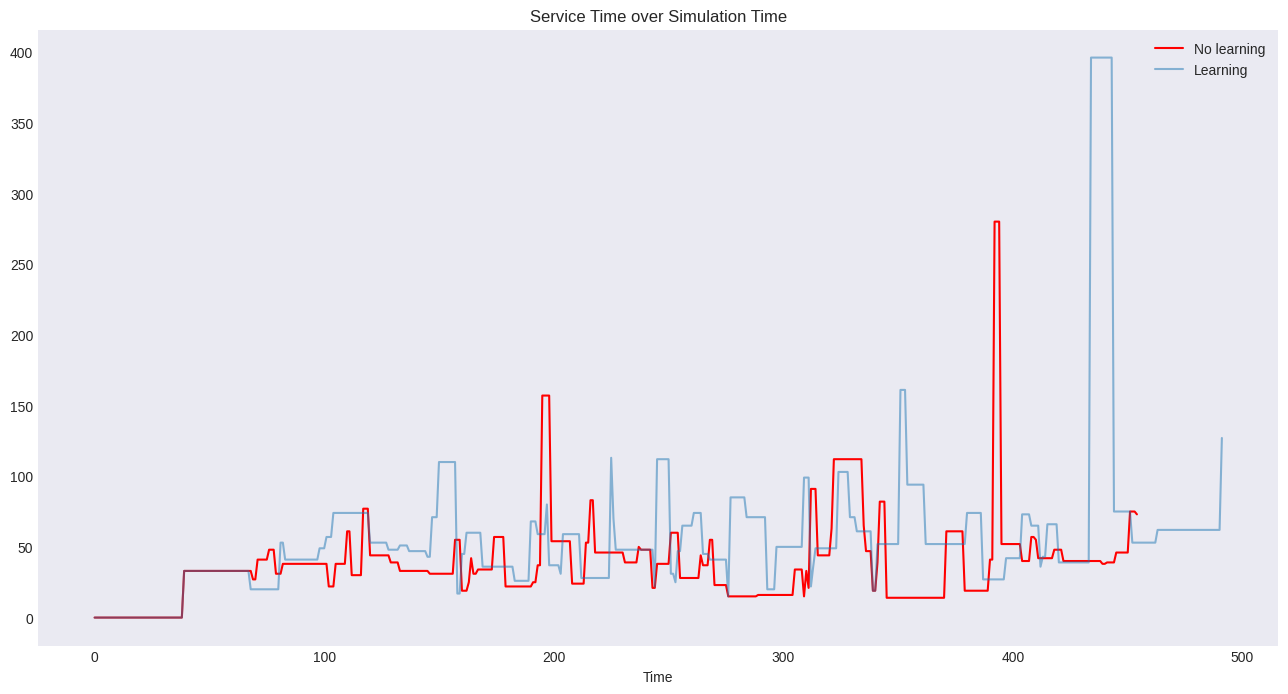

In [19]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(df["time"], df["serv_times"], label="No learning", color="r")
ax.plot(df_learning["time"], df_learning["serv_times"], alpha=0.5, label="Learning")
ax.set_xlabel('Service Time')
ax.set_xlabel('Time')
ax.set_title('Service Time over Simulation Time')

ax.legend()

plt.show()